# Random Forest

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Carrega o dataset
iris_data = pd.read_csv('./data/iris_data.csv')

In [3]:
# Visualiza as primeiras linhas
print(iris_data.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [4]:
# Resumo estatístico
print(iris_data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
# Correlação
print(iris_data.corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


In [6]:
# Atributos e Variável target
features = iris_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
target_variables = iris_data.Class

In [7]:
# Gera os dados de treino
feature_train, feature_test, target_train, target_test = train_test_split(features,
                                                                         target_variables,
                                                                         test_size = .2)

In [8]:
?train_test_split

In [9]:
# Criação do modelo
clf = DecisionTreeClassifier()

In [10]:
print(clf)

DecisionTreeClassifier()


In [11]:
modelo = clf.fit(feature_train, target_train)
previsoes = modelo.predict(feature_test)

In [12]:
print(confusion_matrix(target_test, previsoes))

[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]


In [13]:
print(accuracy_score(target_test, previsoes))

0.9333333333333333


## Random Forest Classifier - I

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [15]:
# Gera o dataset
digitos = load_digits()

In [16]:
# Aplica Escala nos dados
data = scale(digitos.data)

In [17]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
data.shape

(1797, 64)

In [19]:
# Obtém número de observações e número de atributos
n_obs, n_features = data.shape

In [20]:
n_obs

1797

In [21]:
n_features

64

In [22]:
# Obtém os labels
n_digits = len(np.unique(digitos.target))
labels = digitos.target

In [23]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
# Cria o classificador
clf = RandomForestClassifier(n_estimators = 10)

Os 4 principais parâmetros em Modelos de Random Forest são:
    
n_estimators = Quanto maior, melhor!
    
max_depth = O padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.
    
max_features = Diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.
    
criterion = Define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [25]:
# Construção do modelo
clf = clf.fit(data, labels)

In [26]:
clf

RandomForestClassifier(n_estimators=10)

In [27]:
scores = clf.score(data, labels)

In [28]:
print(scores)

1.0


In [29]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

In [30]:
# Obtém os índices
ind = []
for i in indices:
    ind.append(labels[i])

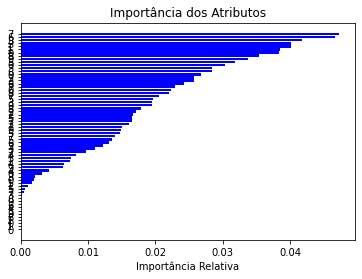

In [31]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title("Importância dos Atributos")
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), ind)
plt.xlabel("Importância Relativa")
plt.show()

## Random Forest Classifier - II

In [32]:
!pip install treeinterpreter

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [34]:
# Carrega o dataset
iris = load_iris()

In [35]:
# Cria o classificador
rf = RandomForestClassifier(max_depth = 4)

In [36]:
# Obtém os índices a partir do comprimento da variável target
idx = list(range(len(iris.target)))

In [37]:
# Randomiza o índice
np.random.shuffle(idx)

In [38]:
# Cria o modelo
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

RandomForestClassifier(max_depth=4)

In [39]:
?rf.predict_proba

In [40]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades
instances = iris.data[idx][100:101]
print(rf.predict_proba(instances))

[[0.         0.44447576 0.55552424]]


In [41]:
prediction, bias, contributions = ti.predict(rf, instances)
print("Previsões", prediction)
print("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], iris.feature_names):
    print(feature, item)

Previsões [[0.         0.44447576 0.55552424]]
Contribuição dos Atributos:
sepal length (cm) [-3.06840196e-02  3.07273301e-02 -4.33104835e-05]
sepal width (cm) [ 0.          0.03398167 -0.03398167]
petal length (cm) [-0.12570135  0.21582681 -0.09012546]
petal width (cm) [-0.15821463 -0.21126005  0.36947468]
